In [58]:
import pandas as pd
import numpy as np

from sktime.datatypes import check_raise
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA, ARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.compose import make_reduction

from etl.generic_provider import GenericDataProvider
from etl.esios.provider import ESIOSDataProvider

In [11]:
%cd ..

In [12]:
ttf_provider = GenericDataProvider("datalake/clean/investingdotcom/")
monthly_ttf_price = ttf_provider.get_series("MONTHLY_TTF_PRICE")

check_raise(monthly_ttf_price, mtype="pd.Series")

True

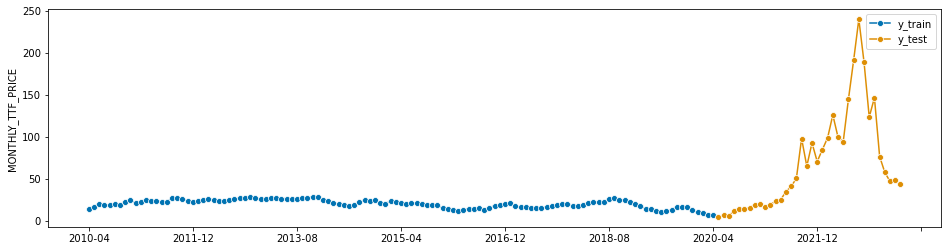

In [40]:
y_train, y_test = temporal_train_test_split(monthly_ttf_price, test_size=36)
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [44]:
fh = np.arange(1, 37)

forecaster = ARIMA()

forecaster.fit(y_train)
y_pred = forecaster.predict(fh = fh)
interval = forecaster.predict_interval(coverage=0.9, fh = fh)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='MONTHLY_TTF_PRICE'>)

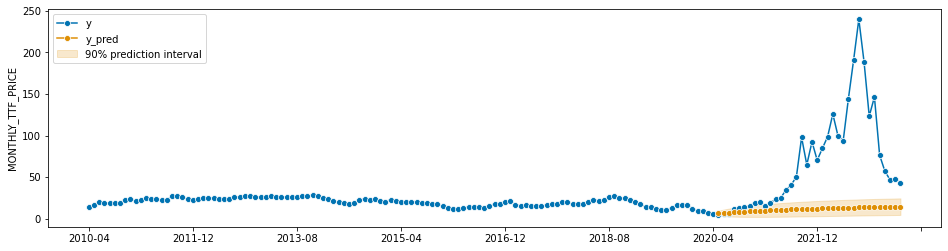

In [45]:
plot_series(monthly_ttf_price, y_pred, labels=["y", "y_pred"], pred_interval=interval)

In [49]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

56.94180554534702

In [50]:
from sktime.registry import all_estimators

all_estimators("forecaster", as_dataframe=True)

,name,estimator
0,ARDL,<class 'sktime.forecasting.ardl.ARDL'>
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
2,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
4,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
5,BATS,<class 'sktime.forecasting.bats.BATS'>
6,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
7,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
8,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
9,Croston,<class 'sktime.forecasting.croston.Croston'>


In [56]:
from sktime.registry import all_estimators

all_estimators(
    "forecaster", as_dataframe=True, return_tags=["capability:pred_int", "ignores-exogeneous-X"]
)

,name,estimator,capability:pred_int,ignores-exogeneous-X
0,ARDL,<class 'sktime.forecasting.ardl.ARDL'>,False,False
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>,True,False
2,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>,True,False
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>,True,True
4,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...,False,False
5,BATS,<class 'sktime.forecasting.bats.BATS'>,True,True
6,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...,True,True
7,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...,True,False
8,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...,True,False
9,Croston,<class 'sktime.forecasting.croston.Croston'>,False,False


In [61]:
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
)

forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="last")),
        ("autoETS", AutoETS(auto=True)),
        ("prophet", Prophet())
    ],
)

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5), window_length=30)
forecaster_param_grid = {"selected_forecaster": ["naive", "autoETS", "prophet"]}
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

18:48:49 - cmdstanpy - INFO - Chain [1] start processing
18:48:49 - cmdstanpy - INFO - Chain [1] done processing
18:48:50 - cmdstanpy - INFO - Chain [1] start processing
18:48:50 - cmdstanpy - INFO - Chain [1] done processing
18:48:50 - cmdstanpy - INFO - Chain [1] start processing
18:48:50 - cmdstanpy - INFO - Chain [1] done processing
18:48:50 - cmdstanpy - INFO - Chain [1] start processing
18:48:51 - cmdstanpy - INFO - Chain [1] done processing
18:48:51 - cmdstanpy - INFO - Chain [1] start processing
18:48:51 - cmdstanpy - INFO - Chain [1] done processing
18:48:51 - cmdstanpy - INFO - Chain [1] start processing
18:48:51 - cmdstanpy - INFO - Chain [1] done processing
18:48:51 - cmdstanpy - INFO - Chain [1] start processing
18:48:52 - cmdstanpy - INFO - Chain [1] done processing
18:48:52 - cmdstanpy - INFO - Chain [1] start processing
18:48:52 - cmdstanpy - INFO - Chain [1] done processing
18:48:52 - cmdstanpy - INFO - Chain [1] start processing
18:48:52 - cmdstanpy - INFO - Chain [1]

0.7721409082188877

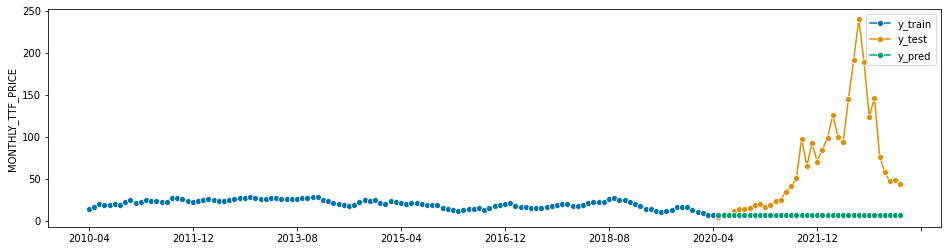

In [99]:
gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [77]:
gscv.cv_results_

,mean_test_MeanAbsolutePercentageError,mean_fit_time,mean_pred_time,params,rank_test_MeanAbsolutePercentageError
0,0.090214,0.006215,0.003440,{'selected_forecaster': 'naive'},1.0
1,0.090984,0.084967,0.004033,{'selected_forecaster': 'autoETS'},2.0
2,0.387935,0.267676,0.053190,{'selected_forecaster': 'prophet'},3.0
